In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import *
import numpy as np
import tensorflow as tf
from livelossplot import PlotLossesKeras

In [2]:
source = "C:\\Users\\mimus\\Documents\\curso_deep_learning\\data\\catvsdog\\"

In [3]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  source,
  shuffle = False,
  validation_split=0.3,
  subset="training",
  image_size=(128, 128),
  batch_size=1)

val = tf.keras.preprocessing.image_dataset_from_directory(
  source,
  shuffle = False,
  validation_split=0.3,
  subset="validation",
  image_size=(128, 128),
  batch_size=1)

Found 2408 files belonging to 2 classes.
Using 1686 files for training.
Found 2408 files belonging to 2 classes.
Using 722 files for validation.


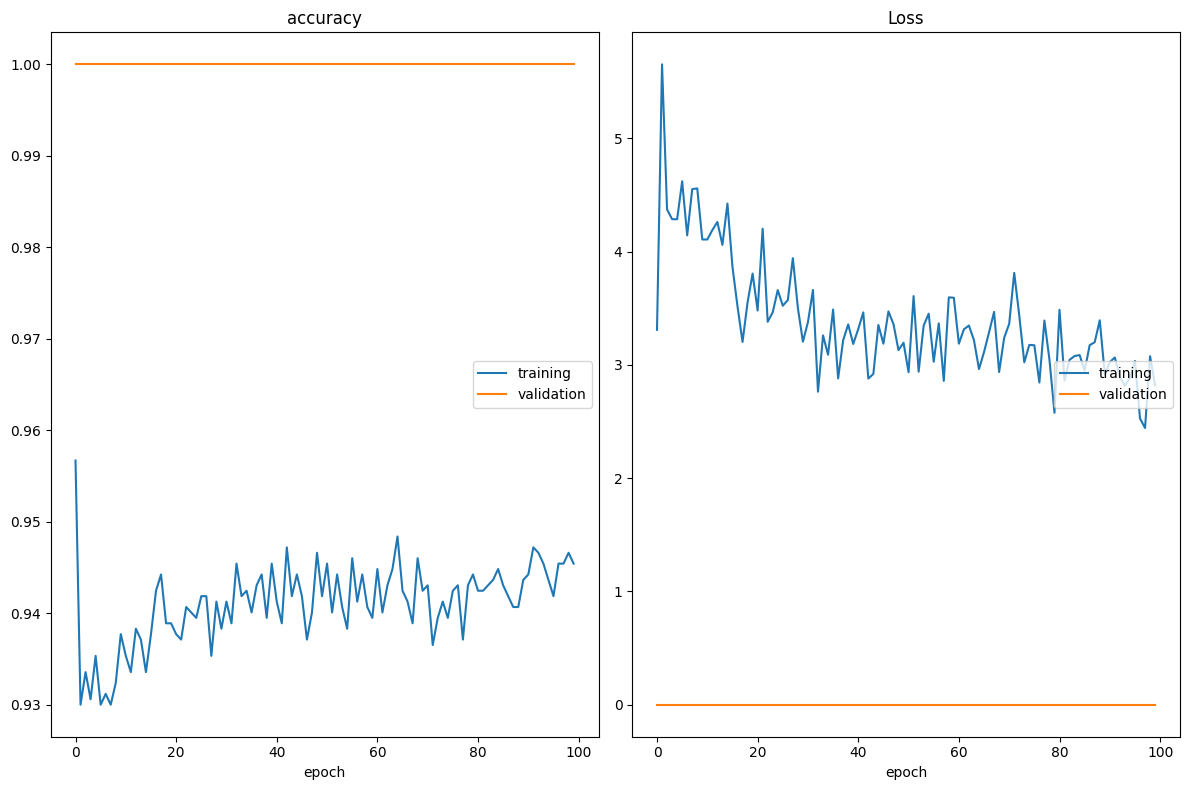

accuracy
	training         	 (min:    0.930, max:    0.957, cur:    0.945)
	validation       	 (min:    1.000, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    2.443, max:    5.654, cur:    2.822)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
1686/1686 [==============================] - 13s 8ms/step - loss: 2.8221 - accuracy: 0.9454 - val_loss: 1.0013e-12 - val_accuracy: 1.0000


In [4]:
plotlosses = PlotLossesKeras()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),input_shape=(128,128,3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(input_shape=(128, 128,3)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation="sigmoid")
])



model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-6),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'],
              )
model.fit(train, epochs=100, validation_data=val, callbacks = [plotlosses])